***Machine Learning Final Project on Credit Worthiness - German Credit Data. ***

In [149]:
#import data and printing Head.
import pandas as pd
import numpy as np

data = pd.read_csv('/content/german_credit.csv')
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [150]:
#PREPROCESSING YOUR DATA
# CHECK FOR MISSING VALUES
data.isnull().sum()

,0
Creditability,0
Account Balance,0
Duration of Credit (month),0
Payment Status of Previous Credit,0
Purpose,0
Credit Amount,0
Value Savings/Stocks,0
Length of current employment,0
Instalment per cent,0
Sex & Marital Status,0


Looks like my data does not have any missing values.

In [151]:
#LOOK FOR DUPLICATE ROWS
data.duplicated().sum()

0

***NO DUPLICATE ROWS AS WELL.***

In [152]:
#LOOK FOR OUTLIERS
data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [153]:
#ANALYZE DATATYPES
data.dtypes

,0
Creditability,int64
Account Balance,int64
Duration of Credit (month),int64
Payment Status of Previous Credit,int64
Purpose,int64
Credit Amount,int64
Value Savings/Stocks,int64
Length of current employment,int64
Instalment per cent,int64
Sex & Marital Status,int64


THERE ARE NO CATEGORICAL VARIABLES IN OUR DATASET. HENCE I CAN MOVE ON TO NEXT STEP i.e. MODELLING.

In [154]:
import numpy as np

# Example: Assuming 'data' is a NumPy array
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Print outliers
print("Number of outliers in each column:")
print(np.sum(outliers, axis=0))



Number of outliers in each column:
Creditability                          0
Account Balance                        0
Duration of Credit (month)            70
Payment Status of Previous Credit      0
Purpose                              118
Credit Amount                         72
Value Savings/Stocks                   0
Length of current employment           0
Instalment per cent                    0
Sex & Marital Status                   0
Guarantors                            93
Duration in Current address            0
Most valuable available asset          0
Age (years)                           23
Concurrent Credits                   186
Type of apartment                    286
No of Credits at this Bank             6
Occupation                           370
No of dependents                     155
Telephone                              0
Foreign Worker                        37
dtype: int64


In [155]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [156]:
print("Shape of data:", data.shape)
print("Number of columns in X:", len(X.columns))


Shape of data: (1000, 21)
Number of columns in X: 20


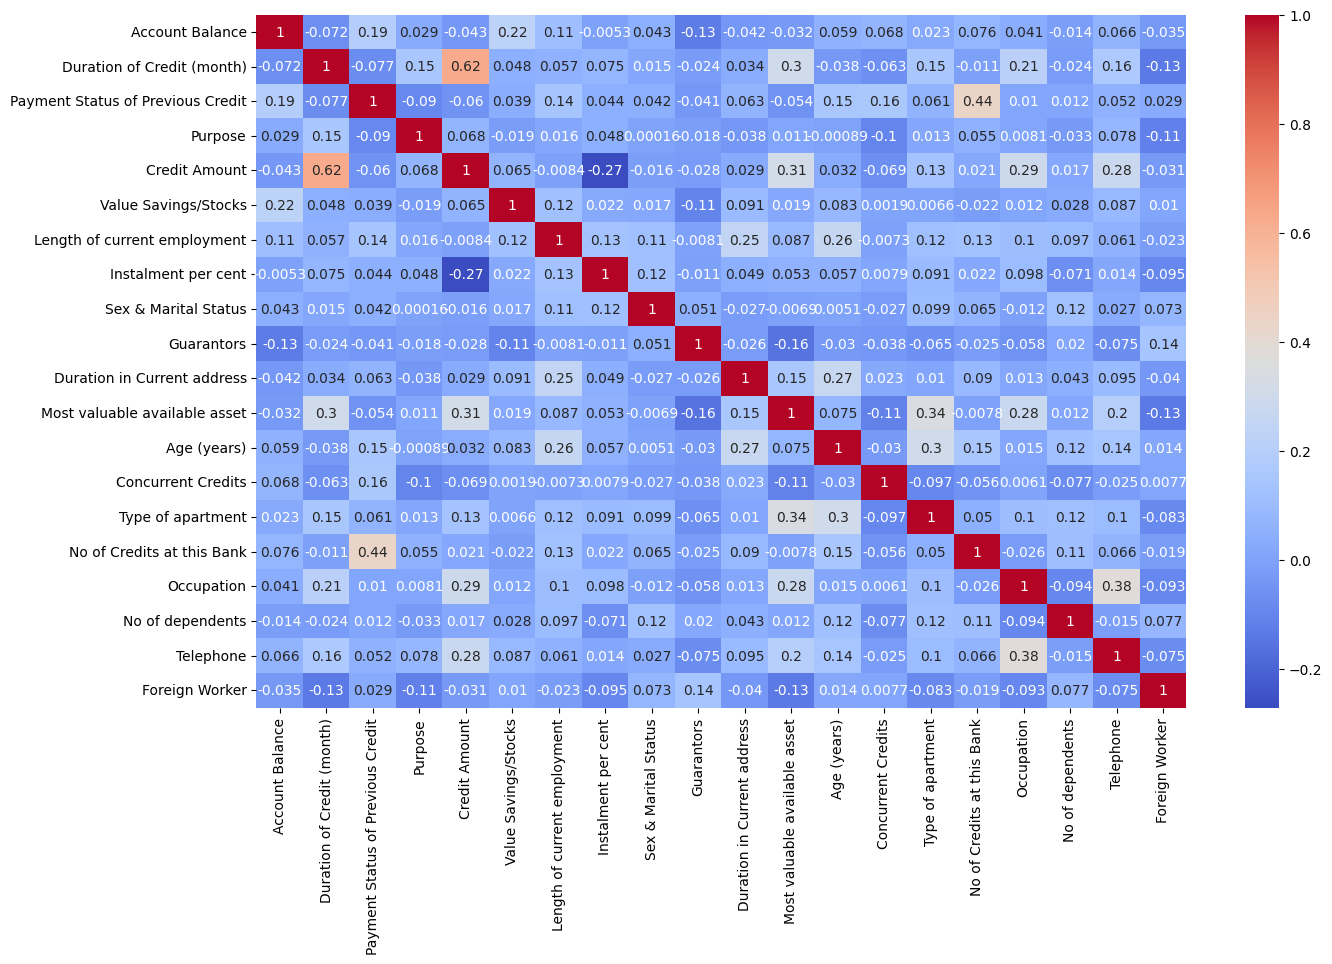

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is a DataFrame containing the data
data_df = pd.DataFrame(X.values, columns=X.columns)

# Calculate the correlation matrix
corr = data_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Class Counts:
Creditability
1    700
0    300
Name: count, dtype: int64

Class Percentages:
Creditability
1    70.0
0    30.0
Name: proportion, dtype: float64


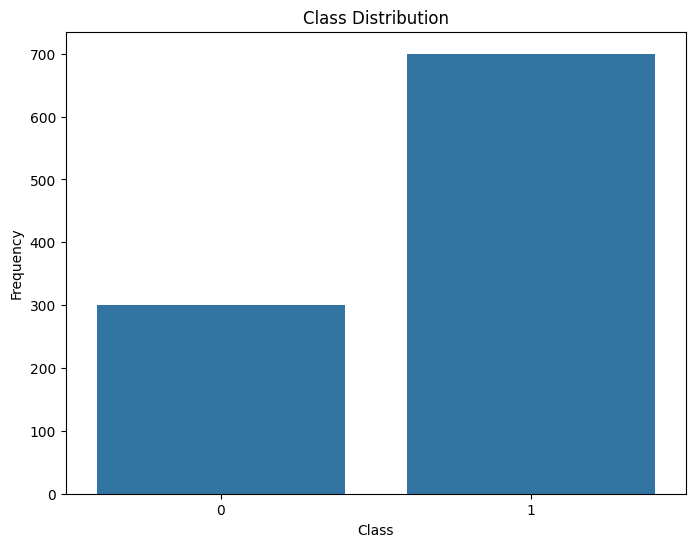

In [158]:
# LOOKING FOR CLASSS IMBALANCES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame and 'Creditability' is a column in it
Creditability = 'Creditability'
class_counts = data[Creditability].value_counts()
class_percentages = data[Creditability].value_counts(normalize=True) * 100

# Print class distribution
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)

# Plot class distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


0.735
              precision    recall  f1-score   support

           0       0.64      0.34      0.44        62
           1       0.75      0.91      0.83       138

    accuracy                           0.73       200
   macro avg       0.70      0.63      0.63       200
weighted avg       0.72      0.73      0.71       200

[[ 21  41]
 [ 12 126]]


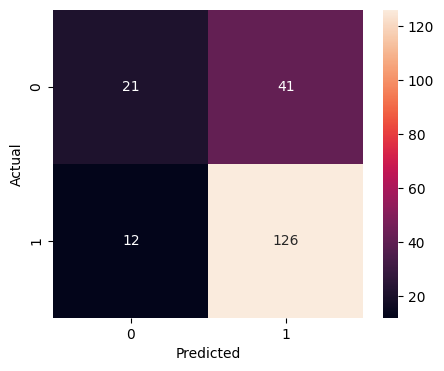

In [159]:
#BUILDING LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/german_credit.csv')

X = data.drop('Creditability', axis=1)
y = data['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

LogReg = LogisticRegression( max_iter=1000, penalty='l2')
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")


In [162]:
#FIND OUT MOST INFLUENTIAL ATTRIBUTE
coefficients = LogReg.coef_
for i, col in enumerate(X.columns):
  print(f'{col}: {coefficients[0][i]}')



Account Balance: 0.49943036468419916
Duration of Credit (month): -0.028736529449410214
Payment Status of Previous Credit: 0.3832093847965118
Purpose: 0.0015901817706818401
Credit Amount: -8.887724918532215e-05
Value Savings/Stocks: 0.2636487713305192
Length of current employment: 0.12416786433214559
Instalment per cent: -0.3914795401984388
Sex & Marital Status: 0.22656342936934948
Guarantors: 0.08617826228578743
Duration in Current address: -0.01766391056757025
Most valuable available asset: -0.16896920220676728
Age (years): 0.007538483770682762
Concurrent Credits: 0.007121740204577899
Type of apartment: 0.1646703588034878
No of Credits at this Bank: -0.3531084256190179
Occupation: -0.11639789828005176
No of dependents: -0.19354391170262006
Telephone: 0.29081316176070604
Foreign Worker: -0.0138128666844852


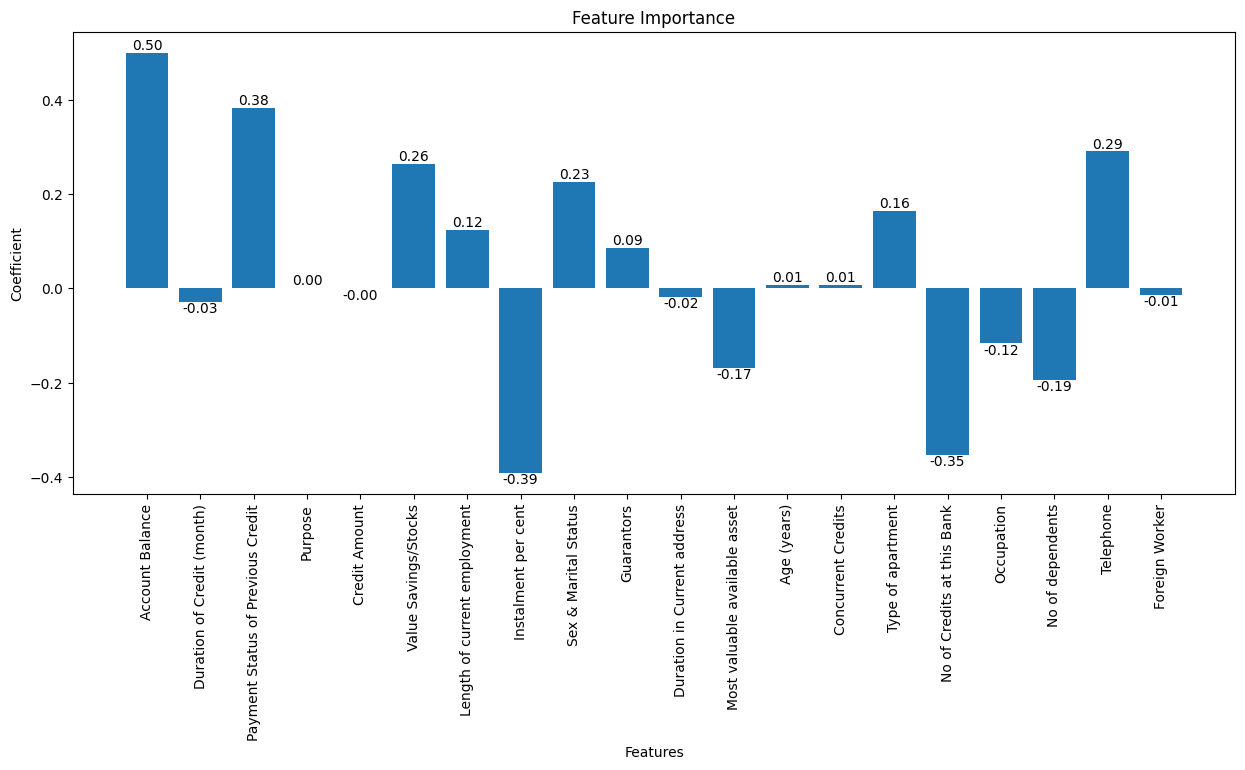

In [163]:
#bar graph
plt.figure(figsize=(15, 6))
plt.bar(X.columns, coefficients[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
for i, coef in enumerate(coefficients[0]):
    plt.text(i, coef, f'{coef:.2f}', ha='center', va='bottom' if coef >= 0 else 'top')
plt.show()


In [164]:

print ('Actual vs Predicted')
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


Actual vs Predicted
     Actual  Predicted
521       0          0
737       1          1
740       1          1
660       1          1
411       1          1
..      ...        ...
408       1          1
332       1          1
208       1          0
613       1          0
78        1          1

[200 rows x 2 columns]


0.725
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        62
           1       0.83      0.75      0.79       138

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.74      0.72      0.73       200

[[ 41  21]
 [ 34 104]]


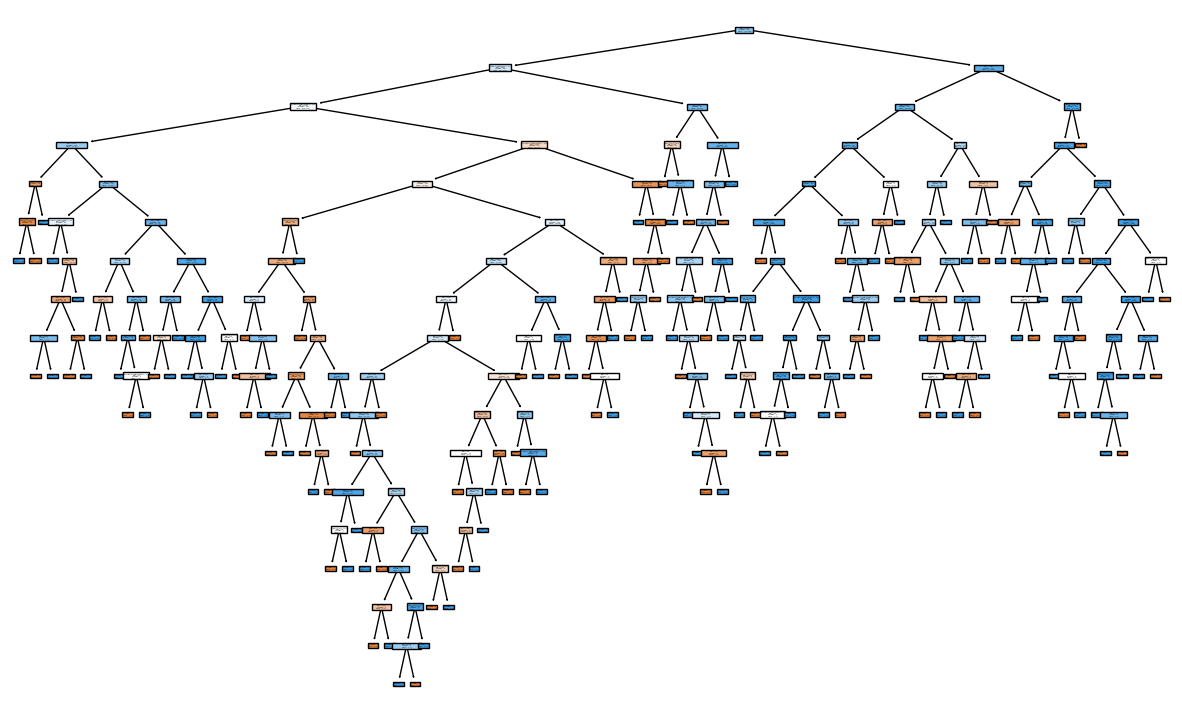

ROC Curve


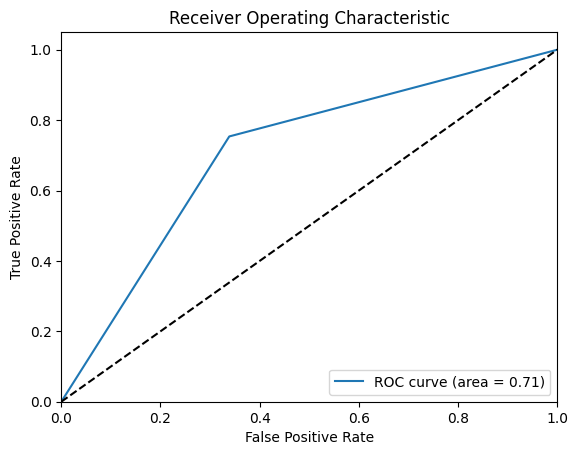

In [165]:
# building a decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Creditability', axis=1)
y = data['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

#plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,9))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

#ROC FOR DECISION TREE
print('ROC Curve')
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

linear SVM 0.75
linear SVM               precision    recall  f1-score   support

           0       0.64      0.44      0.52        62
           1       0.78      0.89      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.75      0.73       200

linear SVM [[ 27  35]
 [ 15 123]]


sigmoid SVM 0.735
sigmoid SVM               precision    recall  f1-score   support

           0       0.62      0.37      0.46        62
           1       0.76      0.90      0.82       138

    accuracy                           0.73       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.72      0.73      0.71       200

sigmoid SVM [[ 23  39]
 [ 14 124]]


polynomial SVM 0.71
polynomial SVM               precision    recall  f1-score   support

           0       0.56      0.29      0.38        62
           1       0.74      0.90      0.81       138

    accuracy     

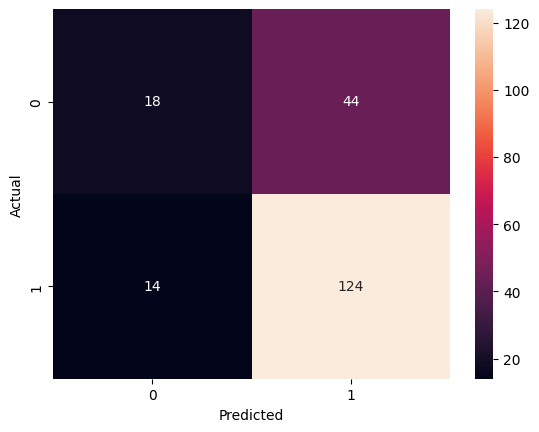

In [166]:
#BUILD SVM MODEL
# USE SCALING METHOD
# SVM USING LINEAR KERNAL, SIGMOID, POLYNOMIAL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/german_credit.csv')

X = df.drop('Creditability', axis=1)
y = df['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("linear SVM", accuracy_score(y_test, y_pred))

print("linear SVM",classification_report(y_test, y_pred))

print("linear SVM",confusion_matrix(y_test, y_pred))

print("\n")
#SIGMOID SVM
svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("sigmoid SVM", accuracy_score(y_test, y_pred))

print("sigmoid SVM",classification_report(y_test, y_pred))

print("sigmoid SVM",confusion_matrix(y_test, y_pred))

print("\n")
#polynomial
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("polynomial SVM", accuracy_score(y_test, y_pred))

print("polynomial SVM",classification_report(y_test, y_pred))

print("polynomial SVM",confusion_matrix(y_test, y_pred))

#PRINT A CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [167]:
#BUILD RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop('Creditability', axis=1)
y = data['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.76
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        62
           1       0.78      0.90      0.84       138

    accuracy                           0.76       200
   macro avg       0.73      0.68      0.69       200
weighted avg       0.75      0.76      0.75       200

[[ 28  34]
 [ 14 124]]
